# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.202165e+01     6.783400e+00
 * time: 0.00422215461730957
     1     2.873764e+01     4.664812e+00
 * time: 0.012978076934814453
     2     2.507108e+01     1.020088e+01
 * time: 0.034440040588378906
     3     1.309947e+01     2.701925e+00
 * time: 0.05995821952819824
     4     1.200587e+01     2.386951e+00
 * time: 0.07569122314453125
     5     1.167517e+01     1.620878e+00
 * time: 0.09147214889526367
     6     1.058973e+01     1.798570e+00
 * time: 0.10736203193664551
     7     9.911738e+00     1.376048e+00
 * time: 0.12262415885925293
     8     9.670931e+00     9.687551e-01
 * time: 0.1776261329650879
     9     9.568820e+00     6.998523e-01
 * time: 0.19310307502746582
    10     9.499022e+00     6.274614e-01
 * time: 0.20844221115112305
    11     9.454003e+00     5.966485e-01
 * time: 0.22400712966918945
    12     9.432940e+00     2.877872e-01
 * time: 0.2395780086517334
    13     9.421889e+00     4.783466e-01
 * time:

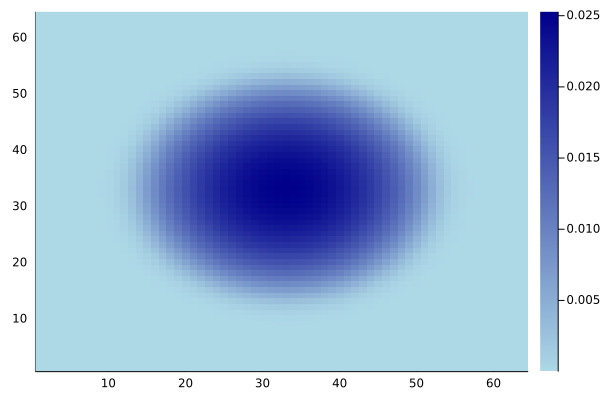

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)